# 2CSSID Lab01. Logistic Regression

<p style='text-align: right;font-style: italic;'>Designed by: Mr. Abdelkrime Aries</p>

In this lab, we will learn all about logistic regression:
- Linear regression
- Binary logistic regression
- Multi-class logistic regression
- Multi-label logistic regression

**Team:**
- **Member 01**: ...
- **Member 02**: ...

In [1]:
import sys, timeit
from typing          import Tuple, List, Type
from collections.abc import Callable

sys.version

'3.10.0 (default, Oct 11 2024, 20:27:36) [GCC 13.2.0]'

In [2]:
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.26.4', '2.2.2', '3.9.1')

In [3]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import SGDClassifier
from sklearn.multiclass      import OneVsRestClassifier
from sklearn.multiclass      import OneVsOneClassifier
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import log_loss

sklearn.__version__

'1.5.1'

In [4]:
# This code is used to filter warnings concerning convergence
# In general, when the maximum number of iterations is not suffisant to converge
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

## I. Algorithms implementation

In this section, we will try to implement all forms of linear/logistic regression. In fact, those forms are similar and use almost the same algorithms. For example, multi-label LR is actually binary regression with multiple outputs. 


**>> Try to use "numpy" which will save a lot of time and effort**

### I.1. Prediction functions

We want to implement all prediction functions used for linear regression, binary logistic regression and Maximum entropy (Logistic regression with softmax).

#### I.1.1. Linear combination

Given an input:
- $X[M, N]$ a matrix of $M$ samples and $N$ features

and some parameters ($theta_0$ is already embedded as the first parameter):
- $\theta[N]$: in case of binary classification 
- $\theta[N, L]$: in case of multi-class classification. $L$ is the number of classes/labels.

calculate the output: 
- $Z[M]$: each sample has one output (binary)
- $Z[M, L]$: each sample has $L$ outputs (multiple)

each class/label $c$ (in case of binary classification, there is only one label) has an output:
$$Z_c = \sum\limits_{j=0}^{N} \theta_{(c, j)} X_j | X_0 = 1 $$

A more general form: 
$$Z = zfn(X, \theta) = X \cdot \theta$$


In [5]:
# TODO: Linear combination
def zfn(X: np.ndarray, Theta: np.ndarray) -> np.ndarray: 
    return None

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([1. , 1.7, 2.4]),
#  array([[0. , 0. , 0. ],
#         [0.5, 0.1, 0.6],
#         [0.2, 0.3, 0. ],
#         [0.7, 0.4, 0.6]]))
#---------------------------------------------------------------------

X_t     = np.array([[1., 100.], 
                    [1., 200.], 
                    [1., 300.]])
Theta_t = np.array([0.3, 0.007])

X_tL = np.array([[0., 0.], 
                 [1., 0.], 
                 [0., 1.], 
                 [1., 1.]]) # 4 samples, 2 features
Theta_tL = np.array([[0.5, 0.1, 0.6],
                     [0.2, 0.3, 0.0]]) # 2 features, 3 classes
# binary, multiple
zfn(X_t, Theta_t), zfn(X_tL, Theta_tL)

(array([1. , 1.7, 2.4]),
 array([[0. , 0. , 0. ],
        [0.5, 0.1, 0.6],
        [0.2, 0.3, 0. ],
        [0.7, 0.4, 0.6]]))

#### I.1.2. Logistic function

Given the linear combination:
- $Z[M]$: each sample has one output (binary)
- $Z[M, L]$: each sample has $L$ outputs (multiple)

We generate prediction probabilities:
- $H[M]$: each sample has one output (binary)
- $H[M, L]$: each sample has $L$ outputs (multiple)

Using the logistic function:
$$H = \sigma(Z) = \frac{1}{1+e^{-Z}}$$

**>> Using numpy arrays, this function works for vectors and matrices**

In [6]:
# TODO: Logistic function
def sgfn(Z: 'np.ndarray[M, L]') -> 'np.ndarray[M, L]': 
    return  None

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([0.73105858, 0.84553473, 0.9168273 ]),
#  array([[0.5       , 0.5       , 0.5       ],
#         [0.62245933, 0.52497919, 0.64565631],
#         [0.549834  , 0.57444252, 0.5       ],
#         [0.66818777, 0.59868766, 0.64565631]]))
#---------------------------------------------------------------------

Z_t = np.array([1. , 1.7, 2.4])
Z_tL = np.array([[0. , 0. , 0. ],
                 [0.5, 0.1, 0.6],
                 [0.2, 0.3, 0. ],
                 [0.7, 0.4, 0.6]])

# binary, multiple
sgfn(Z_t), sgfn(Z_tL)

(array([0.73105858, 0.84553473, 0.9168273 ]),
 array([[0.5       , 0.5       , 0.5       ],
        [0.62245933, 0.52497919, 0.64565631],
        [0.549834  , 0.57444252, 0.5       ],
        [0.66818777, 0.59868766, 0.64565631]]))

#### I.1.3. Softmax function

Given the linear combination:
- $Z[M, L]$: each sample has $L$ outputs (multiple)

We generate predictions:
- $H[M, L]$: each sample has $L$ outputs (multiple)

Using the softmax function:
$$H = softmax(Z)=\frac{e^Z}{\sum\limits_{k=1}^{L} e^{Z_k}}$$

Basically:
- Calculate $H' = e^Z$
- Then divide $H'$ by the vector $H'$ summed over colums
- numpy automatically transforms a vector $V[M, 1]$ into $V[M]$. So, you have to force a vertical vector using **reshape(-1, 1)**.
- The sum of probabilities in each row must equal 1

In [7]:
# TODO: Softmax function
def softmaxfn(Z: np.ndarray) -> np.ndarray:
    return None

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# array([[0.33333333, 0.33333333, 0.33333333],
#        [0.36029662, 0.24151404, 0.39818934],
#        [0.34200877, 0.37797814, 0.28001309],
#        [0.37797814, 0.28001309, 0.34200877]])
#---------------------------------------------------------------------

Z_tL = np.array([[0. , 0. , 0. ],
                 [0.5, 0.1, 0.6],
                 [0.2, 0.3, 0. ],
                 [0.7, 0.4, 0.6]])
softmaxfn(Z_tL)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.36029662, 0.24151404, 0.39818934],
       [0.34200877, 0.37797814, 0.28001309],
       [0.37797814, 0.28001309, 0.34200877]])

### I.2. Cost functions

We want to implement these cost functions:
- Mean Square Error (MSE): for linear regression
- Binary Cross Entropy (BCE): for binary logistic regression and multi-label logistic regression
- Cross Entropy (CE): for maximum entropy (MaxEnt) algorithm (multi-class logistic regression)


#### I.2.1. Mean Square Error (MSE)

Given the estimated outputs $H[M]$, calculate the error based on the real outputs $Y[M]$.

$$J = MSE(Y, H) = \frac{1}{2M} \sum\limits_{i=1}^{M} (Y - H)^2$$

**>> This is used for linear regression which is applicable only on one output per sample**

In [8]:
# TODO: MSE cost function
def MSEfn(Y: 'np.ndarray[M]', 
        H: 'np.ndarray[M]') -> float:
    return None

#=====================================================================
# UNIT TEST
#=====================================================================
# Result:
# 0.016666666666666673
#---------------------------------------------------------------------

H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])
MSEfn(Y_t, H_t)

0.016666666666666673

#### I.2.2. Binary Cross Entropy (BCE)

Given the output probabilities:
- $H[M]$: each sample has one output (binary)
- $H[M, L]$: each sample has $L$ outputs (multi-label)

and the real classes:
- $Y[M]$: each sample has one output (binary)
- $Y[M, L]$: each sample has $L$ outputs (multi-label)

The BCE loss for one sample is:
$$BCE(Y^{(i)}, H^{(i)})
= \begin{cases}
- \log(H^{(i)}) & \text{ si } Y^{(i)} = 1\\ 
- \log(1 - H^{(i)})  & \text{ si } Y^{(i)} = 0
\end{cases}
$$
Since $Y^{(i)} \in \{0, 1\}$, then: 

$$ BCE(Y^{(i)}, H^{(i)}) = - Y^{(i)} \log(H^{(i)}) - (1- Y^{(i)}) \log(1 - H^{(i)}) $$

Then, the loss function will be:
$$J = BCE(Y, H) = \frac{-1}{M} \sum\limits_{i=1}^{M} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]$$

**>> practically, a little value epsilon is added into the log to avoid log(0)**

In [9]:
# TODO: BCE loss function
def BCEfn(Y  : 'np.ndarray[M,L]', 
        H  : 'np.ndarray[M,L]', 
        eps: float = 1e-8   ) -> float: 
    return None

#=====================================================================
# UNIT TEST
#=====================================================================
# Result:
# (0.7559612797265517,
#  0.7559612499514038,
#  0.7112278056068634,
#  0.7112277848173427)
#---------------------------------------------------------------------

Y_t = np.array([1., 0., 1.])
H_t = np.array([0.73105858, 0.84553473, 0.9168273 ])

Y_tL = np.array([[1, 0, 1],
                 [1, 1, 0],
                 [1, 1, 1],
                 [0, 0, 1]]) # multilabel
H_tL = np.array([[0.5       , 0.5       , 0.5       ],
                 [0.62245933, 0.52497919, 0.64565631],
                 [0.549834  , 0.57444252, 0.5       ],
                 [0.66818777, 0.59868766, 0.64565631]])

BCEfn(Y_t, H_t, eps=0), BCEfn(Y_t, H_t), BCEfn(Y_tL, H_tL, eps=0), BCEfn(Y_tL, H_tL)

(0.7559612797265517,
 0.7559612499514038,
 0.7112278056068634,
 0.7112277848173427)

#### I.2.3. Cross Entropy (CE)

Given the output probabilities:
- $H[M, L]$: each sample has $L$ outputs (multi-class)

and the real classes:
- $Y[M, L]$: each sample has $L$ outputs (multi-class)

$$J = CE(H, Y) = \frac{-1}{M} \sum\limits_{i=1}^{M} \sum\limits_{c=1}^{L} Y^{(i)}_c \log(H^{(i)}_c)$$

**>> HINT: sum over classes (column), mean over samples**

In [10]:
# TODO: CE loss function
def CEfn(Y: np.ndarray, H: np.ndarray) -> float:
    return None

#=====================================================================
# UNIT TEST
#=====================================================================
# Result:
# 1.1913194530574498
#---------------------------------------------------------------------

Y_tL = np.array([[1,0,0], 
                 [0,1,0], 
                 [0,0,1], 
                 [1,0,0]])
H_tL = np.array([[0.33333333, 0.33333333, 0.33333333],
                 [0.36029662, 0.24151404, 0.39818934],
                 [0.34200877, 0.37797814, 0.28001309],
                 [0.37797814, 0.28001309, 0.34200877]])

CEfn(Y_tL, H_tL)

1.1913194530574498

### I.3. Gradients

We want to implement these cost functions' gradients:
- dMSE: for linear regression
- dBCE: for binary logistic regression (the same as dMSE) and multi-label logistic regression (a little different)
- dCE: for maximum entropy (MaxEnt) algorithm (multi-class logistic regression)

**>> Good news: gradients function is the same**


Given the input:
- $X[M, N]$ a matrix of $M$ samples and $N$ features

the real output values:
- $Y[M]$: each sample has one output
- $Y[M, L]$: each sample has $L$ outputs

and the estimated output:
- $H[M]$: each sample has one estimated output
- $H[M, L]$: each sample has $L$ estimated outputs

calculate the gradients: 
- $\frac{\partial J}{\partial \theta}[N]$: each feature has one gradient
- $\frac{\partial J}{\partial \theta}[N, L]$: each feature has $L$ gradients

The gradients are calculated as (matrix form):
$$\frac{\partial J}{\partial \theta} = \frac{1}{M} (X^T \cdot (H - Y))$$

---
A BORING CALCULATION (MSE)

$$\frac{\partial MSE}{\partial \theta_j} 
= \frac{\partial }{\partial \theta_j} \frac{1}{2M} \sum\limits_{i=1}^{M} (Y^{(i)} - H^{(i)})^2 
= \frac{1}{2M} \sum\limits_{i=1}^{M} [\frac{\partial }{\partial \theta_j} (Y^{(i)} - H^{(i)})^2]
= \frac{1}{2M} \sum\limits_{i=1}^{M} [-2 (Y^{(i)} - H^{(i)}) \frac{\partial }{\partial \theta_j} H^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j}
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}]
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \theta_j X_j^{(i)}]
$$
$$\frac{\partial MSE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

---
A BORING CALCULATION (BCE)

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{\partial}{\partial \theta_j} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{\partial}{\partial \theta_j} \log(H^{(i)}) + (1- Y^{(i)}) \frac{\partial}{\partial \theta_j}\log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{1}{H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)} + (1- Y^{(i)}) \frac{-1}{1-H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)})]
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} \frac{\partial}{\partial \theta_j} H^{(i)}
$$

$$\frac{\partial H^{(i)}}{\partial \theta_j} 
= \frac{\partial \sigma(Z^{(i)})}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial \theta_j} 
= [\sigma(Z^{(i)}) (1-\sigma(Z^{(i)}))]\frac{\partial}{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}  
= H^{(i)} (1-H^{(i)})  X_j^{(i)}
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} [H^{(i)} (1-H^{(i)}) X_j^{(i)}]
$$

$$\frac{\partial BCE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$


In [11]:
# TODO: Gradients
def dJfn(X: np.ndarray, H: np.ndarray, Y: np.ndarray) -> np.ndarray:
    return None

#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# (array([ 0.13333333, 30.        ]),
#  array([[ 0.06543131,  0.11961822, -0.18504953],
#         [ 0.07000327, -0.16449781,  0.09449454]]))
#---------------------------------------------------------------------

X_t = np.array([[1., 100.], 
                [1., 200.], 
                [1., 300.]])
H_t = np.array([1. , 1.7, 2.4])
Y_t = np.array([1., 2., 2.5])

X_tL = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
H_tL = np.array([[0.33333333, 0.33333333, 0.33333333],
                 [0.36029662, 0.24151404, 0.39818934],
                 [0.34200877, 0.37797814, 0.28001309],
                 [0.37797814, 0.28001309, 0.34200877]])
Y_tL = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])


dJfn(X_t, Y_t, H_t), dJfn(X_tL, Y_tL, H_tL)

(array([ 0.13333333, 30.        ]),
 array([[ 0.06543131,  0.11961822, -0.18504953],
        [ 0.07000327, -0.16449781,  0.09449454]]))

### I.4. Final product

**>> Nothing to code here**

This section is to show how all the previous algorithms are merged into one usefull program. 
So, we will use all the previously implemented functions, add some others and implement a class which is easy to use.

#### I.4.1. Gradient descent 

This is the simplest version of gradient descent. It iterates until it reaches the maximum iterations.
It takes estimation function, cost function and gradient function as arguments so we can used it for different problems (linear regression, binary logistic regression, etc.). Also known as polymorphism.

In [12]:
# Gradient descent. By default, it is linear regression
def GDfn (X    : 'np.ndarray[M, N]', # Input M samples, N features (obligatory)
          Y    : 'np.ndarray[M, L]', # Output M samples, L classes (obligatory)
          Theta: 'np.ndarray[N, L]', # Parameters (obligatory)
          IT   : int      = 100    , # Maximum number of iterations
          alpha: float    = 0.01   , # Learning rate
          H_fn : Callable = zfn    , # Estimation function
          J_fn : Callable = MSEfn  , # Cost function
          dJ_fn: Callable = dJfn     # Gradient function
         ) -> Tuple[List[np.ndarray], List[float]]: 
     
    costs  = []           # costs history
    Theta  = Theta.copy() # make a copy of the original parameters
    
    for it in range(IT):
        H  = H_fn (X, Theta) # estimation
        J  = J_fn (Y, H)     # cost
        dJ = dJ_fn(X, H, Y)  # gradients
        
        costs.append(J) # add cost into history
        Theta = Theta - alpha * dJ # update parameters
         
    return Theta, costs

#=====================================================================
# UNIT TEST
#=====================================================================
# Result:
# (array([0.86298175, 0.58991304, 0.96329937]),
#  [6.3375,
#   5.32767996484375,
#   4.48068435059748,
#   3.7702582684901684,
#   3.174380343989813])
#---------------------------------------------------------------------

X_t = np.array([
    [1, 1, 0.2],
    [1, 2, 0.1],
    [1, 3, 0.4],
    [1, 4, 0.3]
])
Theta_t = np.array([1., 1., 1.])
Y_t = np.array([1, 0, 1, 0])

Theta_new, J_hist = GDfn(X_t, Y_t, Theta_t, IT=5)

Theta_new, J_hist

(array([0.86298175, 0.58991304, 0.96329937]),
 [6.3375,
  5.32767996484375,
  4.48068435059748,
  3.7702582684901684,
  3.174380343989813])

#### I.4.2. Data preparation functions 

The function **norm** normalizes the input $X' = \frac{X-\mu}{\sigma}$:
- in case of training data $X_{train}$, the mean and standard deviation are calculated on this data
- in case of test data $X_{test}$, the mean and standard deviation must be those calculated over $X_{train}$ (passed as arguments)

The function **prepare** returns a prepared data:
- if norm=True: data will be normalized; otherwise it will be the same
- if bias=True: a column of 1s will be added into $X$ (it is like adding $\theta_0$)

In [13]:
# normalize X based on the 
def normfn(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    X_norm = np.where(std==0, X, (X - mean)/std)
    return X_norm, mean, std

def preparefn(X, norm=True, bias=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normfn(X_pre, mean=mean, std=std)
    if bias:
        X_pre = np.append(np.ones((X_pre.shape[0],1)), X_pre ,axis=1)
    return X_pre, mean, std

#=====================================================================
# UNIT TEST
#=====================================================================
# Result:
# ((array([[ 1.        , -1.22474487, -0.26726124],
#          [ 1.        ,  0.        , -1.06904497],
#          [ 1.        ,  1.22474487,  1.33630621]]),
#   array([2.        , 0.23333333]),
#   array([0.81649658, 0.12472191])),
#  (array([[-0.25,  1.  ],
#          [ 0.25,  0.  ],
#          [ 0.75,  3.  ]]),
#   array([1.5, 0.1]),
#   array([2. , 0.1])))
#---------------------------------------------------------------------

X_t = np.array([[1, 0.2],
                [2, 0.1],
                [3, 0.4]])

preparefn(X_t), preparefn(X_t, bias=False, mean=np.array([1.5, 0.1]), std=np.array([2, 0.1]))

((array([[ 1.        , -1.22474487, -0.26726124],
         [ 1.        ,  0.        , -1.06904497],
         [ 1.        ,  1.22474487,  1.33630621]]),
  array([2.        , 0.23333333]),
  array([0.81649658, 0.12472191])),
 (array([[-0.25,  1.  ],
         [ 0.25,  0.  ],
         [ 0.75,  3.  ]]),
  array([1.5, 0.1]),
  array([2. , 0.1])))

#### I.4.3.  Missing functions 

These are functions which must be implemented before 

In [14]:
def vote(H: np.ndarray) -> np.ndarray:
    res = np.zeros(H.shape)
    res[range(len(H)), H.argmax(axis=1)] = 1
    return res


#### I.4.4.  Regression class 

In [15]:
class Regression(object):
    
    def __init__(self, norm=True, bias=True, type='linear'): 
        self.norm  = norm
        self.bias  = bias
        
        # by default linear regression
        self.Hfn : Callable = zfn   # Estimation function
        self.Yfn : Callable = zfn   # Prediction function
        self.Jfn : Callable = MSEfn # Cost function
        self.dJfn: Callable = dJfn  # Gradient function
            
        if type in ['binary', 'multilabel']:
            self.Hfn = lambda X, Theta : sgfn(zfn(X, Theta))
            self.Yfn = lambda X, Theta : (self.Hfn(X, Theta) >= 0.5).astype(int)
            self.Jfn = BCEfn
        elif type == 'multiclass':
            self.Hfn = lambda X, Theta : softmaxfn(zfn(X, Theta))
            self.Yfn = lambda X, Theta : vote(self.Hfn(X, Theta))
            self.Jfn = CEfn
            
    
    def fit(self, X, Y, max_iter=100, alpha=.01) -> List[float]: 
        X_pre, self.mean, self.std = preparefn(X, norm=self.norm, bias=self.bias)
        if len(Y.shape) > 1:
            Theta = np.zeros((X_pre.shape[1], Y.shape[1]))
        else:
            Theta = np.zeros(X_pre.shape[1])
        self.Theta, costs = GDfn(X_pre, Y, Theta, IT=max_iter, alpha=alpha)
        return costs
        
        
    # Predictions
    # if prob=True return probbilities
    # else return labels
    def predict(self, X, prob=True):
        X_pre, _, _ = preparefn(X, norm=self.norm, bias=self.bias, mean=self.mean, std=self.std)
        if prob:
            return self.Hfn(X_pre, self.Theta)
        return self.Yfn(X_pre, self.Theta)


#=====================================================================
# UNIT TEST
#=====================================================================
# Result: 
# array([[1., 0., 0.],
#        [0., 1., 0.],
#        [0., 1., 0.],
#        [0., 0., 1.]])
#---------------------------------------------------------------------
X_tn = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]])
Y_tn = np.array([[1,0,0], [0,1,0], [0,0,1], [1,0,0]])

X_testn = np.array([[2., 2.], [1., 0.], [1., -1.], [2., 5.]])

maxent = Regression(type='multiclass')
_ = maxent.fit(X_tn, Y_tn)
maxent.predict(X_testn, prob=False)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## II. Application and Analysis

In this section, we will test different concepts by running an experiment, formulating a hypothesis and trying to justify it. 



In [16]:
grades = pd.read_csv('data/grades.csv')

# Extraction des caractéristiques 
Xgrades = grades.iloc[:, :-1].values # Premières colonnes 
Ygrades = grades.iloc[:,  -1].values # Dernière colonne 

Xgrades_norm = Xgrades/20 # Nous savons le maximum

grades.head()

,G1,G2,Admitted
0,9.75,16.00,1
1,2.25,9.50,0
2,4.50,2.50,0
3,15.50,10.25,1
4,3.25,19.50,1


In [17]:
# https://www.kaggle.com/datasets/kukuroo3/body-performance-data
body = pd.read_csv('data/bodyPerformance.csv')
body['gender'] = (body['gender'] == 'M').astype(int)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [18]:
Xbody = body.iloc[:, :-1].values # First columns
Ybody = body.iloc[:,  -1].values # Last column  

Xbody_train, Xbody_test, Ybody_train, Ybody_test = train_test_split(Xbody, Ybody, 
                                                                    test_size   =0.2, # 20% for test
                                                                    random_state=0, 
                                                                    stratify    =Ybody) # stratification

scaler = StandardScaler()

Xbody_train = scaler.fit_transform(Xbody_train)
Xbody_test  = scaler.transform(Xbody_test)

Xbody_train.shape, Xbody_test.shape

((10714, 11), (2679, 11))

### II.1. Binary Ligistic Regression

We want to test the pupose of:
- Bias parameter
- Data normalization
- Learning rate

So, we run a series of experiments.


In [19]:
# This function will be used to draw a decision boundary given a model
# model: binary clasification model
# ax: an object of type matplotlib.axes.Axes; the axes on which we will draw
# xrange: a list of points on the X axis (the first feature)
# yrange: a list of points on the Y axis (the second feature)
# color: the color of the decision boundary
# label: the label of the decision boundary
def draw2D(model, ax, xrange, yrange, color='red', label=''):
    # Create a matrix of (xrange X yrange): our drawing map
    XX   = [[[xr, yr] for xr in xrange] for yr in yrange]
    # Represent it as a matrix [(xrange X yrange)/2 samples, 2 features]
    XX   = np.array(XX).reshape(-1, 2)
    # Predict the probabilities (estimation) et retransform them into our map (xrange X yrange)
    grid = model.predict(XX).reshape(len(xrange), len(yrange))
    # Draw the lines which cross the value 0.5
    cs   = ax.contour(xrange, yrange, grid, colors=[color], linewidths=(1), linestyles=('-'),levels=[0.5])
    # Assign the label to the boundary
#     plt.clabel(cs, inline=1, fontsize=10)
#     cs.collections[0].set_label(label)
    fmt = {cs.levels[0]: label}
    ax.clabel(cs, cs.levels, inline=True, fmt=fmt, fontsize=14)
    
print('DONE')

DONE


#### II.1.1. Bias

We want to test what the bias really does (why it is useful) 
To this end, we took a linearly separated problem: a student is admitted if the average of the grades is higher or equals 10.

Because the results can be plotted, we will validate the models visually.
For this, we trained two models:
- **Plain**: without a bias
- **Bias**: with a bias

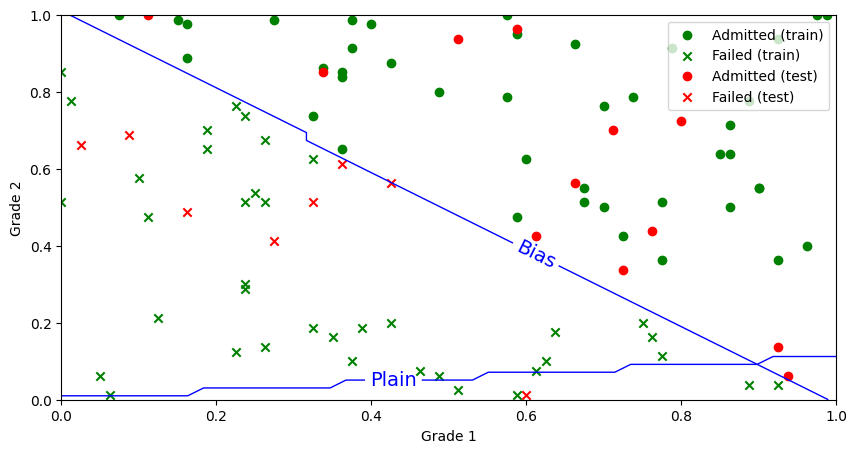

In [20]:
    
Xgrades_train = Xgrades_norm[:80, :]
Xgrades_test  = Xgrades_norm[80:, :]
Ygrades_train = Ygrades[:80   ]
Ygrades_test  = Ygrades[80:   ]

yes_train = Ygrades_train == 1
yes_test  = Ygrades_test  == 1

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(Xgrades_train[yes_train, 0], 
           Xgrades_train[yes_train, 1], 
           color='green', marker='o', label='Admitted (train)')
ax.scatter(Xgrades_train[~yes_train, 0], 
           Xgrades_train[~yes_train, 1], 
           color='green', marker='x', label='Failed (train)')
ax.scatter(Xgrades_test[yes_test, 0], 
           Xgrades_test[yes_test, 1], 
           color='red', marker='o', label='Admitted (test)')
ax.scatter(Xgrades_test[~yes_test, 0], 
           Xgrades_test[~yes_test, 1], 
           color='red', marker='x', label='Failed (test)')



# Create grades space: btween 0 and 1 (normalized) with a resolution of 50
xrange = np.linspace(0, 1, 50) # Grade 1
yrange = np.linspace(0, 1, 50) # Grade 2

# Dessiner la ligne de séparation dans une régression linéaire
LR_plain = LogisticRegression(penalty=None, fit_intercept=False)
LR_plain.fit(Xgrades_train, Ygrades_train)
draw2D(LR_plain, ax, xrange, yrange, label='Plain', color='blue')

LR_bias = LogisticRegression(penalty=None)
LR_bias.fit(Xgrades_train, Ygrades_train)
draw2D(LR_bias, ax, xrange, yrange, label='Bias', color='blue')



plt.xlabel('Grade 1')
plt.ylabel('Grade 2')
plt.legend(loc='upper right')
plt.show()

**TODO: Analyze the results**

1. Describe the results (what do you notice?)
1. Discuss the effect of bias in this particular example (How it effects the decision boundary)

**Answers**

1. ...
1. ...

#### II.1.2. Normalization

We want to test if normalizing data affects model training. 
To this end, we want to test two aspects:
1. Convergence speed
1. Convergence quality

This is why we trained two models: One on the original data and another on the normalized data. Then, we plotted the cost history according to the iterations.

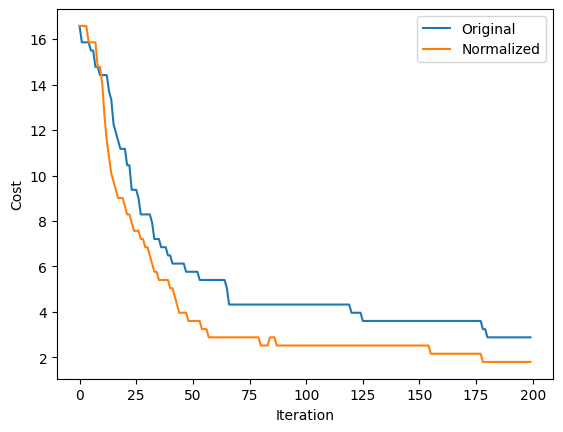

In [21]:
# We will use SGDClassifier instead of LogisticRegression
# Because LogisticRegression does not permit learning rate definition
# we will use "partial_fit" instead of "fit" which is a mini-batch implementation
# but, we pass all the dataset

ALPHA = 0.01
ITMAX = 200

LRbin_orig = SGDClassifier(penalty=None, 
                           warm_start=True, 
                           loss='log_loss', 
                           learning_rate='constant', 
                           eta0=ALPHA,
                           shuffle=False
                          )
LRbin_norm = SGDClassifier(penalty=None, 
                           warm_start=True, 
                           loss='log_loss', 
                           learning_rate='constant', 
                           eta0=ALPHA,
                           shuffle=False
                          )

classes = np.unique(Ygrades)
costs_orig = []
costs_norm = []

for it in range(ITMAX):
    LRbin_orig.partial_fit(Xgrades,      Ygrades, classes=classes)
    LRbin_norm.partial_fit(Xgrades_norm, Ygrades, classes=classes)
    
    costs_orig.append(log_loss(Ygrades, LRbin_orig.predict(Xgrades     )))
    costs_norm.append(log_loss(Ygrades, LRbin_norm.predict(Xgrades_norm)))

# Visualization
plt.plot(costs_orig, label = 'Original')
plt.plot(costs_norm  , label = 'Normalized')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
#plt.autoscale()
plt.show()

**TODO: Analyze the results**

We note that normalized-data-based model converge faster and better than the original-data-based one in term of iterations. Faster = it reaches its optimal point where it cannot enhance the error more quickly. Better: the error when it converges is less.

1. Why faster? (explain how normalization can effect speed)
1. Why better? (explain how normalization can effect quality)

**Answers**

1. ...
1. ...

#### II.1.3. Learning rate

We want to test the effect of learning rate on training convergence. This is why we trained identical models with different learning rates and then plotted the cost history for each.

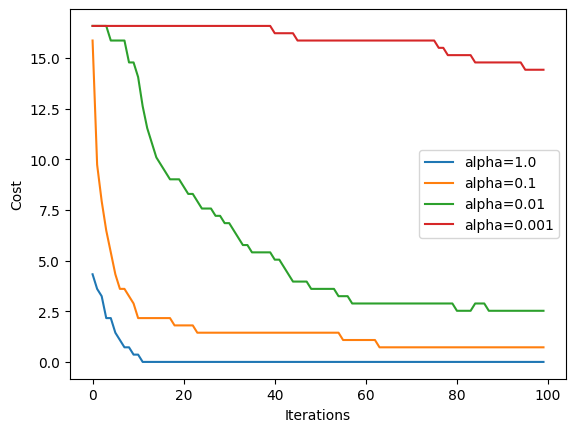

In [22]:
ITMAX  = 100
alphas = [1., 0.1, 0.01, 0.001]

classes = np.unique(Ygrades)

# For each training rate, we train a separate model
for alpha in alphas:
    # Create a new logistic regression model
    mdl = SGDClassifier(penalty=None, 
                        warm_start=True, 
                        loss='log_loss', 
                        learning_rate='constant', 
                        eta0=alpha,
                        shuffle=False
                        )
    costs = []
    for it in range(ITMAX):
        # train the model
        mdl.partial_fit(Xgrades_norm, Ygrades, classes=classes)
        costs.append(log_loss(Ygrades, mdl.predict(Xgrades_norm)))
        
    # Visualization
    plt.plot(costs, label = 'alpha=' + str(alpha))
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
#plt.autoscale()
plt.show()

**TODO: Analyze the results**

We note that the model converges fast when alpha=0.1. In fact, it converges around iteration 15. When alpha is smaller, the model takes more iterations to converge. For example, the model with alpha=1.0 didn't converge even after 100 iterations.

**Hypothesis:** a larger learning rate can lead to faster convergence 

1. Justify this hypothesis.
1. Why we don't use a learning rate of 1 with just one iteration?
1. Why we don't use a learning rate of 1 or more with manye iterations?

**Answer**
1. ...
1. ...
1. ...

### II.2. Multi-class Logistic Regression 

We want to compare some methods for Multi-class Logistic Regression:
- Maximum entropy (MaxEnt)
- One-vs-Rest  (OvR)
- One-vs-One  (OvO)

In [23]:
# https://goshippo.com/blog/measure-real-size-any-python-object/
# This function will be used to get the size of a trained model
def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

get_size({'first': 0.21, 'second': 'string'})

420

In [24]:
# A function to facilitate testing multiple models
# it depends on global variables: Xbody_train, Ybody_train, Xbody_test, Ybody_test
def multi_eval(mdls, X_trn=Xbody_train, Y_trn=Ybody_train, X_tst=Xbody_test, Y_tst=Ybody_test): 
    # performance metrics
    perf = {
        'trn_time': [],
        'tst_time': [],
        'trn_acc' : [],
        'tst_acc' : [],
        'size'    : [],
    }
    
    for mdl in mdls:
        start_time = timeit.default_timer()
        mdl.fit(X_trn, Y_trn)
        perf['trn_time'].append(timeit.default_timer() - start_time)
    
        Y_pred = mdl.predict(X_trn)
        perf['trn_acc'].append(accuracy_score(Y_trn, Y_pred))
    
        start_time = timeit.default_timer()
        Y_pred = mdl.predict(X_tst)
        perf['tst_time'].append(timeit.default_timer() - start_time)
        perf['tst_acc'].append(accuracy_score(Y_tst, Y_pred))
        
        perf['size'].append(get_size(mdl))
        
    return perf
    
print('DONE')

DONE


#### II.2.1. OvR vs. MaxEnt

We want to compare OvR and MaxEnt based on accuracy. We know that the models are almost identical in term of parameters size. The difference:

| Model   |      OvR      |  MaxEnt |
| :--- |:---|:---|
| Activation function |  Logistic | Softmax |
| Cost function |  Binary cross entropy   | Cross entropy |
| Estimation | Majority vote | Maximal probability |

In [25]:
# n_jobs: use just one CPU core
# this one will be deprcated in future versions; it is faster than the next one
ovr     = LogisticRegression(n_jobs=1, max_iter=200, solver='lbfgs', penalty=None, multi_class='ovr'        )
# this one takes more size qnd time
ovr2    = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=200, penalty=None, n_jobs=1), n_jobs=1)
maxent  = LogisticRegression(n_jobs=1, max_iter=200, solver='lbfgs', penalty=None, multi_class='multinomial')
# ovrP     = LogisticRegression(n_jobs=2, max_iter=200, solver='lbfgs', penalty=None, multi_class='ovr'        )
# maxentP  = LogisticRegression(n_jobs=2, max_iter=200, solver='lbfgs', penalty=None, multi_class='multinomial')

perf = multi_eval([ovr, ovr2, maxent]) # [ovr, maxent, ovrP, maxentP]

pd.DataFrame({
    'Algorithm'     : ['OvR', 'OvR2', 'MaxEnt'], # ['OvR', 'MaxEnt', 'OvRP', 'MaxEntP']
    'Size'          : perf['size'     ],
    'Train time'    : perf['trn_time' ],
    'Test time'     : perf['tst_time' ],
    'Train Accuracy': perf['trn_acc'  ],
    'Test Accuracy' : perf['tst_acc'  ],
})

/opt/env/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/env/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Algorithm,Size,Train time,Test time,Train Accuracy,Test Accuracy
0,OvR,3573,0.070980,0.000379,0.593709,0.597984
1,OvR2,6524,0.083490,0.000904,0.593709,0.597984
2,MaxEnt,3497,0.103554,0.000418,0.620123,0.624860


**TODO: Analyze the results**

We note that the size, train time, test time are almost the same. 

As for the accuracy (train and test), MaXent has better quality than OvR.

1. Why (based on the boundary decision hyperplane/decision mechanism)?
1. Why (based on parameters update manner)?

**Answer**
1. ...
1. ...

#### II.2.3. OvR vs. OvO

We want to compare OvR and OvO using logistic regression. 
We duplicated the data so we will have many samples.


In [26]:
REP = 100

Xbody_trainM = np.repeat(Xbody_train, REP, axis=0)
Ybody_trainM = np.repeat(Ybody_train, REP, axis=0)
Xbody_testM = np.repeat(Xbody_test, REP, axis=0)
Ybody_testM = np.repeat(Ybody_test, REP, axis=0)

ovr_seq = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=100, penalty=None, n_jobs=1), n_jobs=1)
ovo_seq = OneVsOneClassifier (LogisticRegression(solver='lbfgs', max_iter=100, penalty=None, n_jobs=1), n_jobs=1)
ovr_con = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=100, penalty=None, n_jobs=1), n_jobs=-1)
ovo_con = OneVsOneClassifier (LogisticRegression(solver='lbfgs', max_iter=100, penalty=None, n_jobs=1), n_jobs=-1)


perf = multi_eval([ovr_seq, ovo_seq, ovr_con, ovo_con], 
                  X_trn=Xbody_trainM, 
                  Y_trn=Ybody_trainM, 
                  X_tst=Xbody_testM, 
                  Y_tst=Ybody_testM)
# multi_eval(mdls, X_trn=Xbody_trainM, Y_trn=Ybody_trainM, X_tst=Xbody_testM, Y_tst=Ybody_testM)

pd.DataFrame({
    'Algorithm'     : ['Sequential OvR', 'Sequential OvO', 'Concurrent OvR', 'Concurrent OvO'],
    'Size'          : perf['size'     ],
    'Train time'    : perf['trn_time' ],
    'Test time'     : perf['tst_time' ],
    'Train Accuracy': perf['trn_acc'  ],
    'Test Accuracy' : perf['tst_acc'  ],
})

,Algorithm,Size,Train time,Test time,Train Accuracy,Test Accuracy
0,Sequential OvR,6524,5.325552,0.013603,0.593709,0.597984
1,Sequential OvO,8340,3.579512,0.111569,0.623390,0.627473
2,Concurrent OvR,7132,3.817756,0.016206,0.593709,0.597984
3,Concurrent OvO,9238,2.298725,0.128115,0.623390,0.627473


**TODO: Analyze the results**

1. Why the size of OvO is greater than OvR's?
1. Why OvO takes less time to train than OvR?
1. Why OvO takes more time to test than OvR?
1. Why OvO generalizes better than OvR?
1. How to modify OvR for multi-label classification? 
1. How to modify OvO for multi-label classification?

**Answer**
1. ...
1. ...
1. ...
1. ...
1. ...
1. ...

In [27]:
'END OF LAB ...'

'END OF LAB ...'